In [320]:
import os
from DLC_for_WBFM.bin.configuration_definition import *
import pandas as pd
from DLC_for_WBFM.utils.video_and_data_conversion.video_conversion_utils import write_minimax_projection_from_btf
from DLC_for_WBFM.utils.feature_detection.utils_features import *
from DLC_for_WBFM.utils.feature_detection.utils_tracklets import *
from DLC_for_WBFM.utils.feature_detection.feature_pipeline import *
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import *
import numpy as np
from tqdm import tqdm
#from DLC_for_WBFM.utils.preprocessing.DLC_utils import create_dlc_project_from_config
#from DLC_for_WBFM.utils.preprocessing.convert_matlab_annotations_to_DLC import csv_annotations2config_names
#from DLC_for_WBFM.utils.feature_detection.visualize_using_dlc import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build tracklets

i.e. pairwise matches and Frame objects

In [321]:
# Get the 3d bigtiff folder
bigtiff_folder = r'D:\More-stabilized-wbfm'

btf_fname_red = r'test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_red = os.path.join(bigtiff_folder, btf_fname_red)

In [322]:
opt = {'num_slices':33, 'alpha':0.15, 'verbose':0,
       'do_mini_max_projections':True,
       'neuron_feature_radius':5.0,
      'start_frame':0,
      'num_frames':500}

out = track_neurons_full_video(btf_fname_red, **opt)
all_matches_dict, all_likelihoods_dict, all_frames = out

KeyboardInterrupt: 

In [ ]:
clust_df = build_tracklets_from_classes(all_frames,
                                 all_matches_dict,
                                 all_likelihoods_dict=None,
                                 verbose=0)

In [282]:
df, out = stitch_tracklets(clust_df,
                     all_frames,
                     max_stitch_distance=10,
                     min_starting_tracklet_length=20,
                     minimum_match_confidence=0.4,
                     verbose=1)

  0%|                                                                                          | 0/716 [00:00<?, ?it/s]

Trying to consolidate 8518 tracklets
Note: computational time of this function is front-loaded


100%|████████████████████████████████████████████████████████████████████████████████| 716/716 [26:57<00:00,  2.26s/it]

Extended and dropped 118/8518 rows
Finished



c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\DLC_for_WBFM\utils\feature_detection\utils_tracklets.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['all_xyz'] = np.vstack([row['all_xyz'], i1_xyz])


In [324]:
import pickle

fname = r'stitched_df_dat.pickle'
pickle.dump(df,open(fname,'wb'))

fname = 'all_frames_dat.pickle'
pickle.dump((all_matches_dict, all_likelihoods_dict), open(fname,'wb'))
# Can't do: all_frames

## Try very hard to get the really long tracks to be full-length

In [325]:
fname = 'feature_alignment-Charlie-2021-01-22\stitched_df_dat.pickle'
clust_df = pickle.load(open(fname, 'rb'))

In [298]:
df_long, out = stitch_tracklets(df,
                     all_frames,
                     max_stitch_distance=100,
                     min_starting_tracklet_length=100,
                     minimum_match_confidence=0.4,
                     verbose=1)

  0%|                                                                                           | 0/98 [00:00<?, ?it/s]

Trying to consolidate 8518 tracklets
Note: computational time of this function is front-loaded


100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [34:23<00:00, 21.06s/it]

Extended and dropped 35/8518 rows
Finished



c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\DLC_for_WBFM\utils\feature_detection\utils_tracklets.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['all_xyz'] = np.vstack([row['all_xyz'], i1_xyz])


In [ ]:
distant_matches_dict, distant_conf_dict = out[0], out[1]

In [311]:
from DLC_for_WBFM.utils.feature_detection.utils_tracklets import *

tracklet_matches = out[2]
df_long = consolidate_tracklets(clust_df.copy(), tracklet_matches, verbose=1)

df1.shape, df_long.shape

Extended and dropped 35/8518 rows


((8518, 8), (8483, 8))

## Features of the stitched vs. unstitched tracks

In [312]:
us_df = clust_df
s_df = df_long

us_all_len = us_df['all_ind_local'].apply(len)
s_all_len = s_df['all_ind_local'].apply(len)


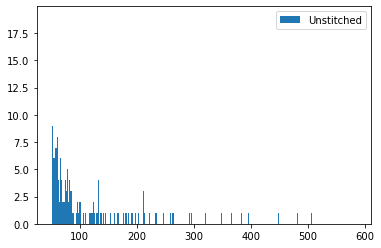

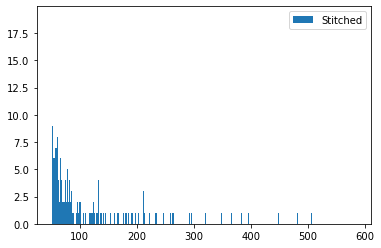

In [313]:
min_len = 50

plt.hist(us_all_len[us_all_len>min_len], label='Unstitched', bins=500)
plt.legend()
plt.figure()
plt.hist(s_all_len[s_all_len>min_len], label='Stitched', bins=500);
plt.legend()

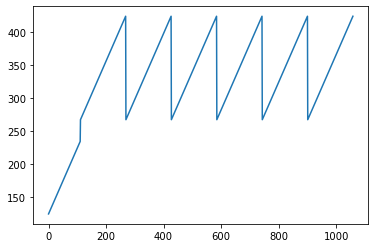

In [328]:
plt.plot(clust_df.loc[np.argmax(us_all_len), 'slice_ind'])

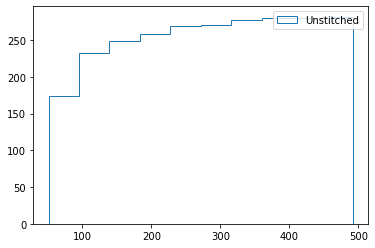

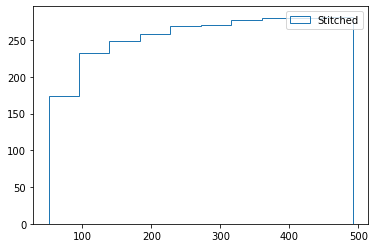

In [297]:
us_all_len = us_df['all_ind_local'].apply(len)
s_all_len = s_df['all_ind_local'].apply(len)

min_len = 50

plt.hist(us_all_len[us_all_len>min_len], label='Unstitched', cumulative=True, histtype='step')
plt.legend()
plt.figure()
plt.hist(s_all_len[s_all_len>min_len], label='Stitched', cumulative=True, histtype='step');
plt.legend()

# Debugging

In [238]:
vid_fname = btf_fname_red
start_frame=0
num_frames=10
num_slices=33
alpha=0.15
neuron_feature_radius=5.0
do_mini_max_projections=True
verbose=0

In [240]:
import_opt = {'num_slices':num_slices, 'alpha':alpha}
ref_opt = {'do_mini_max_projections':do_mini_max_projections,
           'neuron_feature_radius':neuron_feature_radius}
def local_build_frame(frame_ind,
                      vid_fname=vid_fname,
                      import_opt=import_opt,
                      ref_opt=ref_opt):
    dat = get_single_volume(vid_fname, frame_ind, **import_opt)
    metadata = {'frame_ind':frame_ind,
                'vol_shape':dat.shape,
                'video_fname':vid_fname,
                'alpha':import_opt['alpha']}
    f = build_reference_frame(dat,
                              num_slices=import_opt['num_slices'],
                              **ref_opt,
                              metadata=metadata)
    return f

In [272]:
dat = get_single_volume(vid_fname, 15, **import_opt)
neuron_locs, clust_df, all_icp, icp_kps = detect_neurons_using_ICP(dat,
                                                         num_slices=33,
                                                         alpha=1.0,
                                                         min_detections=3,
                                                         verbose=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 18.57it/s]


In [273]:
centroids = get_centroids_from_df(clust_df, 3, verbose=verbose-1)
centroids

0        [3.5, 232.18359883626303, 587.8225504557291]
1        [7.0, 408.03192138671875, 249.4340251575817]
2       [6.5, 426.04377365112305, 257.92764472961426]
3          [7.0, 396.5967610677083, 250.333987765842]
4        [8.5, 417.65782928466797, 288.3392143249512]
                            ...                      
149    [28.5, 394.19122314453125, 243.80647659301758]
151     [29.5, 400.4838053385417, 254.37733205159506]
153        [30.0, 423.24425048828124, 282.9576171875]
154      [30.0, 407.4913696289062, 359.6145935058594]
155     [29.5, 413.29371643066406, 248.1124725341797]
Name: all_xyz, Length: 142, dtype: object

In [274]:
clust_df.at[40, 'all_xyz']

array([[  9.        , 402.28231812, 235.71691895],
       [ 10.        , 401.85952759, 234.86810303],
       [ 11.        , 401.5133667 , 233.5231781 ],
       [ 12.        , 401.54458618, 233.20809937],
       [ 13.        , 401.68118286, 233.13066101],
       [ 14.        , 402.0375061 , 232.62916565]])

In [275]:
clust_df.at[40, 'all_ind_global']

[179, 216, 265, 327, 393, 446]